In [43]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt


In [44]:
data = pd.read_csv("Loan_Default.csv")

In [45]:
data

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [46]:
columns = data.columns.to_list()
columns

['ID',
 'year',
 'loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'property_value',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'income',
 'credit_type',
 'Credit_Score',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'LTV',
 'Region',
 'Security_Type',
 'Status',
 'dtir1']

In [47]:
for i in columns:
  print(i, " has {} unique value(s)".format(data[i].nunique()))

ID  has 148670 unique value(s)
year  has 1 unique value(s)
loan_limit  has 2 unique value(s)
Gender  has 4 unique value(s)
approv_in_adv  has 2 unique value(s)
loan_type  has 3 unique value(s)
loan_purpose  has 4 unique value(s)
Credit_Worthiness  has 2 unique value(s)
open_credit  has 2 unique value(s)
business_or_commercial  has 2 unique value(s)
loan_amount  has 211 unique value(s)
rate_of_interest  has 131 unique value(s)
Interest_rate_spread  has 22516 unique value(s)
Upfront_charges  has 58271 unique value(s)
term  has 26 unique value(s)
Neg_ammortization  has 2 unique value(s)
interest_only  has 2 unique value(s)
lump_sum_payment  has 2 unique value(s)
property_value  has 385 unique value(s)
construction_type  has 2 unique value(s)
occupancy_type  has 3 unique value(s)
Secured_by  has 2 unique value(s)
total_units  has 4 unique value(s)
income  has 1001 unique value(s)
credit_type  has 4 unique value(s)
Credit_Score  has 401 unique value(s)
co-applicant_credit_type  has 2 unique

In [48]:
data.drop(["ID", "year"], axis=1, inplace=True)
columns = data.columns.to_list()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           112231 non-null  float64
 10  Interest_rate_spread       112031 non-null  float64
 11  Upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  Neg_ammortization          14

In [49]:
data.describe()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [50]:
num = data.select_dtypes(include='number').columns.tolist()
cat = data.select_dtypes(exclude='number').columns.tolist()
num

['loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'LTV',
 'Status',
 'dtir1']

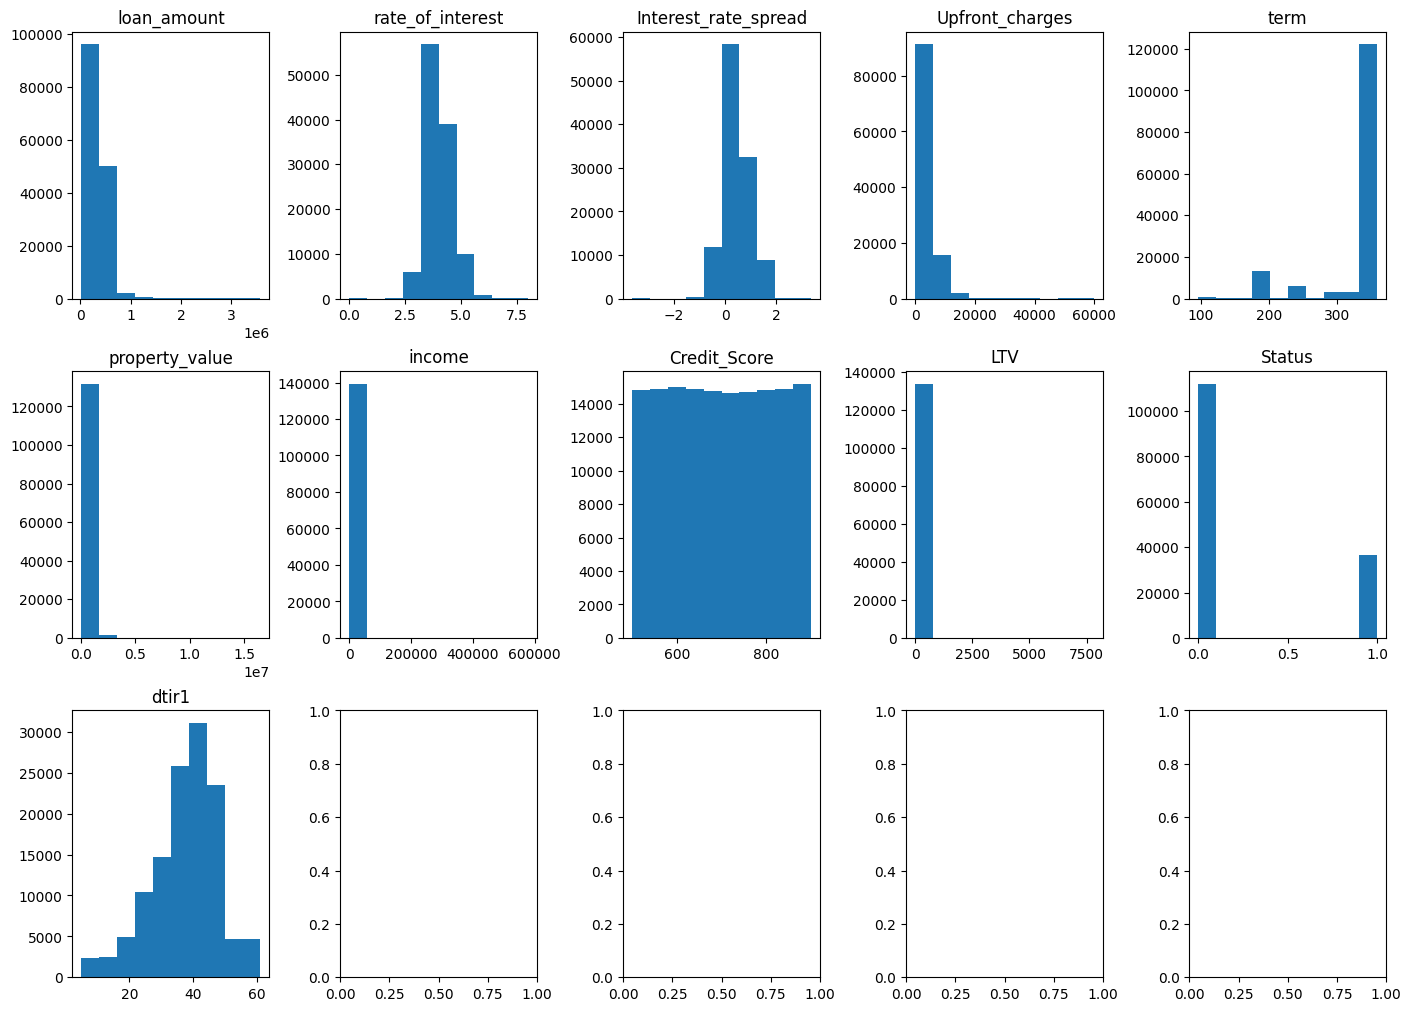

In [51]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(14,10), constrained_layout=True)
#fig.tight_layout()
a = 0
b = 0
for i in num:
  ax[a,b].hist(data[i])
  ax[a,b].set_title('{}'.format(i))
  b+=1
  if b == 5:
    b = 0
    a += 1
plt.show()


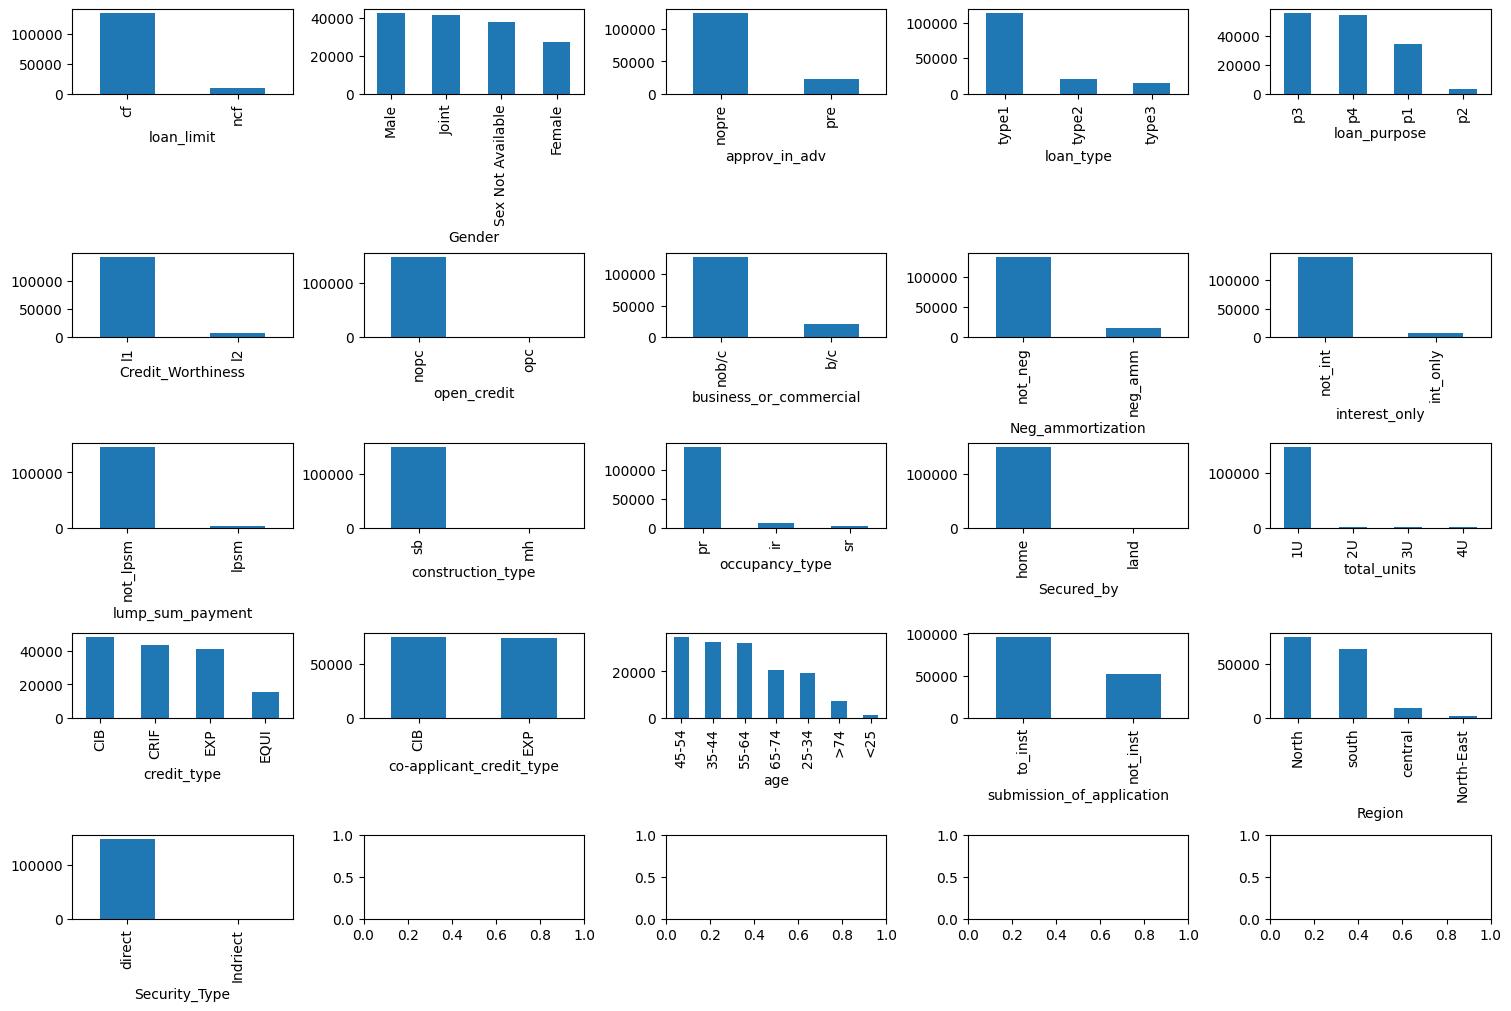

In [52]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(15,10), constrained_layout=True)
c = 0
d = 0
for i in cat:
  count = data[i].value_counts()
  count.plot(kind = "bar", ax = ax[c,d])
  d+=1
  if d == 5:
    d = 0
    c += 1
plt.show()

In [53]:
#Columns with null values
col_null = data.columns[data.isnull().any()].to_list()
for i in col_null:
  print(i, 'has {} null value(s)'.format(data[i].isnull().sum()))

loan_limit has 3344 null value(s)
approv_in_adv has 908 null value(s)
loan_purpose has 134 null value(s)
rate_of_interest has 36439 null value(s)
Interest_rate_spread has 36639 null value(s)
Upfront_charges has 39642 null value(s)
term has 41 null value(s)
Neg_ammortization has 121 null value(s)
property_value has 15098 null value(s)
income has 9150 null value(s)
age has 200 null value(s)
submission_of_application has 200 null value(s)
LTV has 15098 null value(s)
dtir1 has 24121 null value(s)


In [54]:
#Find rows with all NaN
rows_all_nan = data[data.isnull().any(axis = 1)]
rows_all_nan

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
7,NaN,Female,nopre,type1,p4,l1,nopc,nob/c,266500,4.125,...,CIB,863,CIB,55-64,to_inst,86.525974,North,direct,0,42.0
10,cf,Male,nopre,type2,p3,l2,nopc,b/c,136500,NaN,...,EXP,723,CIB,55-64,to_inst,81.250000,North,direct,1,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148651,cf,Joint,nopre,type3,p3,l1,nopc,nob/c,446500,NaN,...,EXP,897,EXP,45-54,to_inst,87.893701,North,direct,1,37.0
148652,cf,Male,nopre,type1,p1,l1,nopc,nob/c,96500,NaN,...,EQUI,608,EXP,55-64,to_inst,NaN,North,direct,1,NaN
148658,cf,Sex Not Available,nopre,type1,p4,l1,nopc,nob/c,386500,NaN,...,EQUI,669,EXP,25-34,to_inst,NaN,south,direct,1,NaN
148661,cf,Sex Not Available,nopre,type2,p4,l1,nopc,b/c,346500,NaN,...,EXP,585,CIB,25-34,to_inst,96.787710,south,direct,1,NaN


In [55]:
data["Interest_rate_spread"]

0            NaN
1            NaN
2         0.2000
3         0.6810
4         0.3042
           ...  
148665    0.2571
148666    0.8544
148667    0.0816
148668    0.5824
148669    1.3871
Name: Interest_rate_spread, Length: 148670, dtype: float64

In [56]:
# Delete rows where age, term, loan purpose, neg ammortisation, submission of appli and approved in adv are null
data.dropna(subset=['approv_in_adv', 'loan_purpose', 'term', 'Neg_ammortization', 'age', 'submission_of_application'], inplace=True)
data


,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [57]:
#create credit category using Experian classification
credit_cat = []
for i in data["Credit_Score"].to_list():
  if i < 580:
    credit_cat.append("poor")
  elif i < 670:
    credit_cat.append("fair")
  elif i < 740:
    credit_cat.append("good")
  elif i < 800:
    credit_cat.append("very good")
  elif i >= 800:
    credit_cat.append("excelent")
data["credit_cat"] = credit_cat
data

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1,credit_cat
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0,very good
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN,poor
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0,excelent
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0,fair
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0,fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,...,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0,fair
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,...,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0,poor
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,...,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0,good
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,...,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0,good


In [58]:
data.isnull().sum()

loan_limit                    3332
Gender                           0
approv_in_adv                    0
loan_type                        0
loan_purpose                     0
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36124
Interest_rate_spread         36124
Upfront_charges              39256
term                             0
Neg_ammortization                0
interest_only                    0
lump_sum_payment                 0
property_value               14964
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        8918
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                              0
submission_of_application        0
LTV                          14964
Region              

In [59]:
from sklearn.preprocessing import LabelEncoder
data2 = data
data2 = data2.dropna()

le = LabelEncoder()
for i in cat:
  data2[i] = le.fit_transform(data2[i])
data2["credit_cat"] = le.fit_transform(data2["credit_cat"])

C:\Users\krost\AppData\Local\Temp\ipykernel_5092\4116245752.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[i] = le.fit_transform(data2[i])
C:\Users\krost\AppData\Local\Temp\ipykernel_5092\4116245752.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[i] = le.fit_transform(data2[i])
C:\Users\krost\AppData\Local\Temp\ipykernel_5092\4116245752.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [60]:
corr = data2.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\krost\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\krost\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1,credit_cat
loan_limit,1.000000,0.002354,0.114901,0.051777,-0.053221,-0.031232,nan,0.003293,0.202364,0.038379,-0.017574,0.044530,0.015095,0.008012,0.040091,0.015745,0.145480,nan,0.009194,nan,-0.008325,0.115249,-0.005670,0.000198,0.026913,-0.014566,0.000426,0.027352,0.000102,nan,nan,0.006703,0.003663
Gender,0.002354,1.000000,0.016406,0.046758,0.026729,-0.004227,nan,0.007884,-0.075287,-0.003501,0.055846,0.116932,-0.057069,-0.002321,0.011297,0.003117,-0.068772,nan,0.005286,nan,-0.002778,-0.010824,0.003881,0.006735,-0.064403,0.009943,0.258416,0.015257,0.459498,nan,nan,-0.017205,-0.002768
approv_in_adv,0.114901,0.016406,1.000000,0.026784,-0.190936,-0.053427,nan,-0.026160,-0.040887,0.053769,0.061564,0.009993,0.034458,0.041363,0.073247,0.026205,-0.071027,nan,0.016919,nan,-0.007471,-0.019438,-0.003253,-0.000508,-0.007507,-0.026803,0.111229,0.102961,-0.009209,nan,nan,0.020069,-0.002202
loan_type,0.051777,0.046758,0.026784,1.000000,-0.158198,0.019727,nan,-0.487762,-0.120558,-0.106847,0.087749,-0.055517,0.095129,-0.011454,0.008191,-0.001871,-0.206318,nan,0.042124,nan,-0.029265,-0.128158,0.005083,-0.005335,0.010193,0.062854,0.125883,0.318532,-0.015627,nan,nan,0.200048,-0.000437
loan_purpose,-0.053221,0.026729,-0.190936,-0.158198,1.000000,-0.058962,nan,0.140482,0.062563,-0.197739,-0.169549,0.056232,-0.160781,0.049620,-0.017531,0.000808,0.189680,nan,-0.023955,nan,-0.010442,0.020950,0.004365,0.001542,0.002682,0.094940,-0.000263,-0.350739,0.070672,nan,nan,-0.108437,-0.003310
Credit_Worthiness,-0.031232,-0.004227,-0.053427,0.019727,-0.058962,1.000000,nan,-0.017957,-0.010202,0.113682,0.043758,-0.013956,0.006028,0.058852,0.041475,0.016699,-0.017744,nan,-0.006945,nan,0.003627,0.007506,0.003477,0.000626,0.005541,0.001536,0.017674,0.020289,-0.005277,nan,nan,0.017343,0.000805
open_credit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
business_or_commercial,0.003293,0.007884,-0.026160,-0.487762,0.140482,-0.017957,nan,1.000000,0.167971,0.028221,-0.398448,0.102360,-0.083273,0.006859,-0.002336,0.003085,0.212622,nan,-0.034717,nan,0.023277,0.126218,-0.007699,0.003793,0.035771,0.049260,-0.102215,-0.244047,0.017269,nan,nan,-0.198571,-0.006222
loan_amount,0.202364,-0.075287,-0.040887,-0.120558,0.062563,-0.010202,nan,0.167971,1.000000,-0.136236,-0.396218,0.070510,0.187915,0.026878,-0.020831,-0.004502,0.746059,nan,-0.003033,nan,0.093292,0.462592,-0.010692,0.004513,0.166497,-0.218477,-0.461348,0.081652,0.009465,nan,nan,0.020339,0.000301
rate_of_interest,0.038379,-0.003501,0.053769,-0.106847,-0.197739,0.113682,nan,0.028221,-0.136236,1.000000,0.582640,-0.122213,0.256636,-0.180873,0.069542,0.017131,-0.179370,nan,-0.199487,nan,0.086961,-0.055855,0.010336,-0.002953,-0.036638,0.037397,0.144662,0.109457,-0.010553,nan,nan,0.059014,0.002308


In [61]:
#replace null values in rate_of_interest.
#group by credit_cat and terms, use median to fill
data["interest_group"] = data.groupby(by = ["credit_cat", "term"])["rate_of_interest"].transform("median")
data["rate_of_interest"] = data["rate_of_interest"].fillna(data.pop("interest_group"))
data["rate_of_interest"].isnull().sum()
a =

SyntaxError: invalid syntax (2023805345.py, line 6)

In [ ]:
#replace null values in upfront charges
#group by type of loan, loan amount.
data["upfront_group"] = data.groupby(by = ["loan_type", "business_or_commercial", "credit_cat", "loan_amount"])["Upfront_charges"].transform("median")
data["Upfront_charges"] = data["Upfront_charges"].fillna(data.pop("upfront_group"))
data["Upfront_charges"].isnull().sum()

In [ ]:
#replace null values in dtir.
#group by credit cat, age, use median to fill.
data["dtir_group"] = data.groupby(by = ["age", "credit_cat"])["dtir1"].transform("median")
data["dtir1"] = data["dtir1"].fillna(data.pop("dtir_group"))
data["dtir1"].isnull().sum()

In [ ]:
#replace null values in income.
#group by gender, credit cat, age, use median to fill.
data["income_group"] = data.groupby(by = ["Gender", "age", "credit_cat"])["income"].transform("median")
data["income"] = data["income"].fillna(data.pop("income_group"))
data["income"].isnull().sum()

In [ ]:
data.isnull().sum()

In [ ]:
corr1 = data[num].corr()
corr1.style.background_gradient(cmap='coolwarm')

In [ ]:
#replace null values in loan limit.
#group by credit cat, loan type, dtir, use median to fill.
data["loanlimit_group"] = data.groupby(by = ["credit_cat", "loan_type"])["loan_limit"].transform(lambda x: pd.Series.mode)
data["loan_limit"] = data["loan_limit"].fillna(data.pop("loanlimit_group"))
data["loan_limit"].isnull().sum()

In [ ]:
data.isnull().sum()

In [ ]:
#replace null values in loan limit.
#group by credit cat, loan type, dtir, use median to fill.
data["property_value_group"] = data.groupby(by = ["credit_cat", "loan_type", "age",])["property_value"].transform(lambda x: pd.Series.mode)
data["property_value"] = data["property_value"].fillna(data.pop("property_value_group"))
data["property_value"].isnull().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
  le.fit_transform(data[i])
'''prop_val_imp_meedian = SimpleImputer(missing_values= np.nan, strategy= "median")'''
